# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

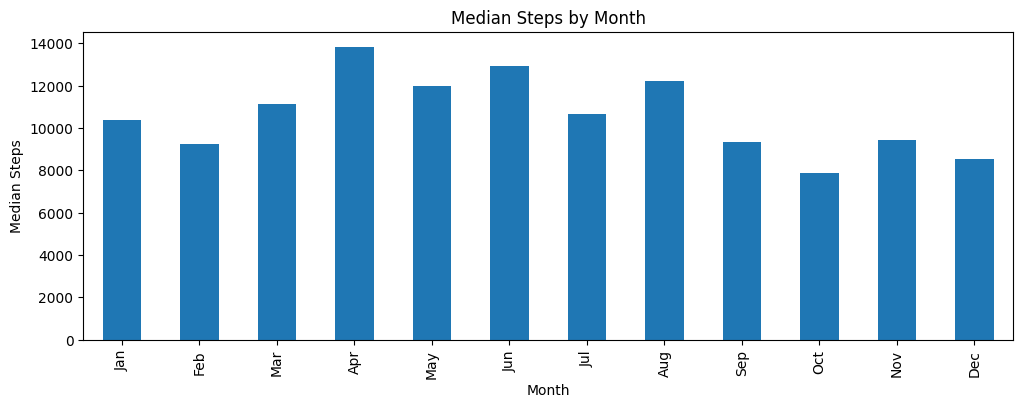

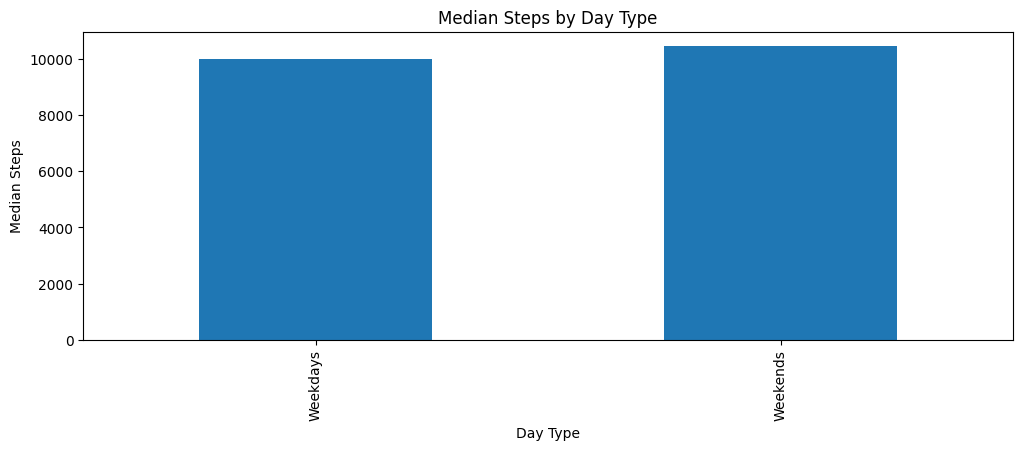

In [2]:
fitbit_data = pd.read_csv('../data/Fitbit2.csv')

fig, ax = plt.subplots(figsize=(12, 4))

monthly_median_steps = fitbit_data.groupby('Months_encoded')['Steps'].median()

# Create a bar plot to visualize the median steps by month
monthly_median_steps.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Median Steps')
ax.set_title('Median Steps by Month')

# Set x-axis labels to the month names
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(range(12))
ax.set_xticklabels(month_labels)

fig, ax = plt.subplots(figsize=(12, 4))

week_vs_weekend_median_steps = fitbit_data.groupby('Work_or_Weekend')['Steps'].median()

week_vs_weekend_median_steps.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Day Type')
ax.set_ylabel('Median Steps')
ax.set_title('Median Steps by Day Type')

# Set x-axis labels
ax.set_xticks(range(2))
ax.set_xticklabels(['Weekdays', 'Weekends'])


# Show the plots
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

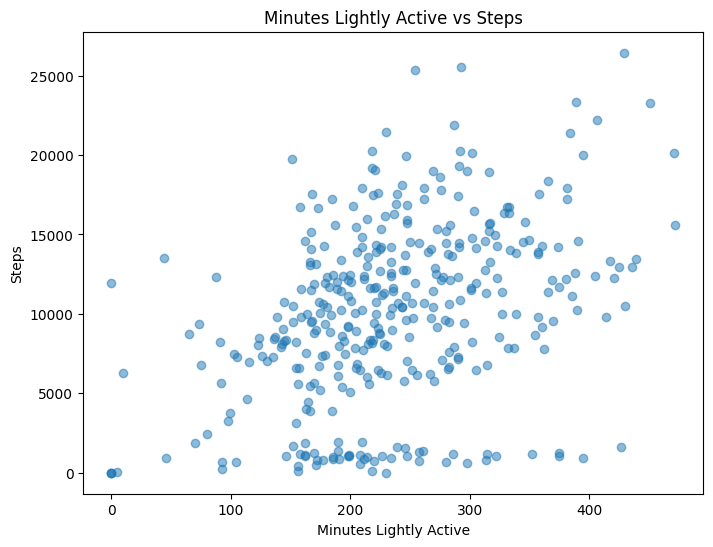

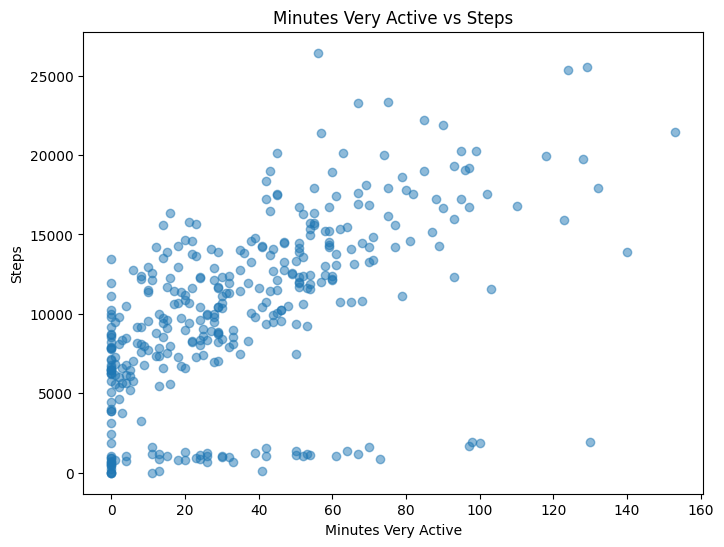

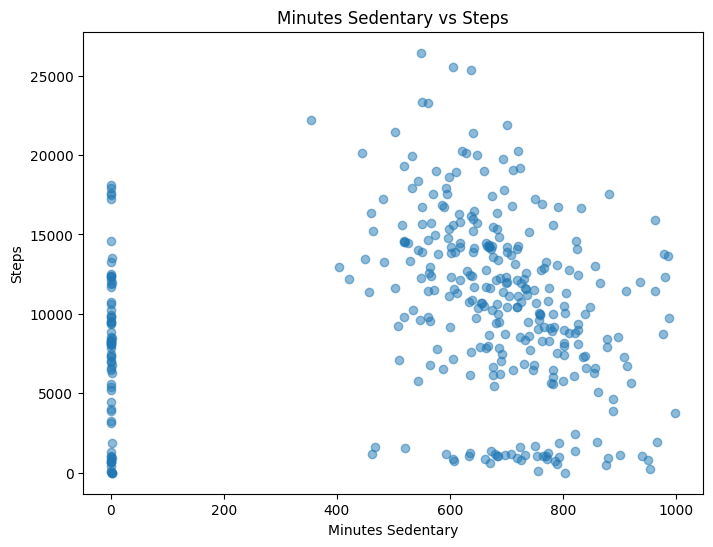

In [3]:
features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
labels = ['Minutes Lightly Active vs Steps', 'Minutes Very Active vs Steps', 'Minutes Sedentary vs Steps']

# Create a loop to plot each scatter plot
for i in range(3):
    # Create a new figure for each scatter plot
    plt.figure(figsize=(8, 6))
    
    # Scatter plot for the current feature vs. Steps
    plt.scatter(fitbit_data[features[i]], fitbit_data['Steps'], alpha=0.5)
    
    # Set labels and title
    plt.xlabel(features[i])
    plt.ylabel('Steps')
    plt.title(labels[i])
    
    # Show the scatter plot
    plt.show()


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [4]:
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [6]:
# NUMERICAL VARIABLES
numerical_variables = titanic.select_dtypes(include=['float', 'int'])
numerical_variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [7]:
# CATEGORICAL VARIABLES
categorical_variables = titanic.select_dtypes('object')
categorical_variables

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [8]:
plt.style.use('classic')

plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

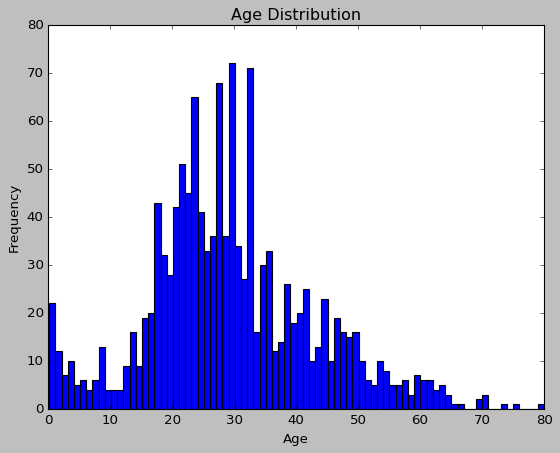

In [9]:
plt.hist(titanic['Age'], bins=80)  

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

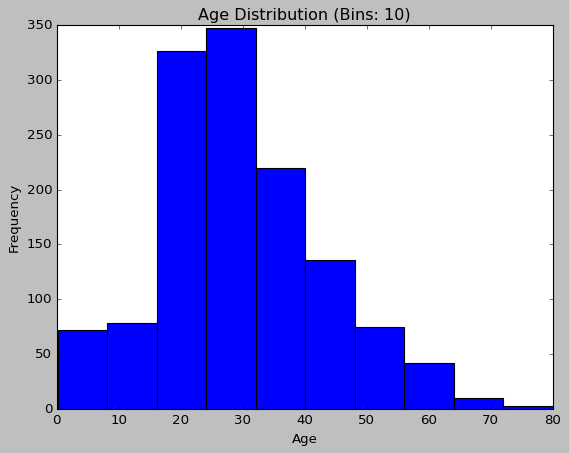

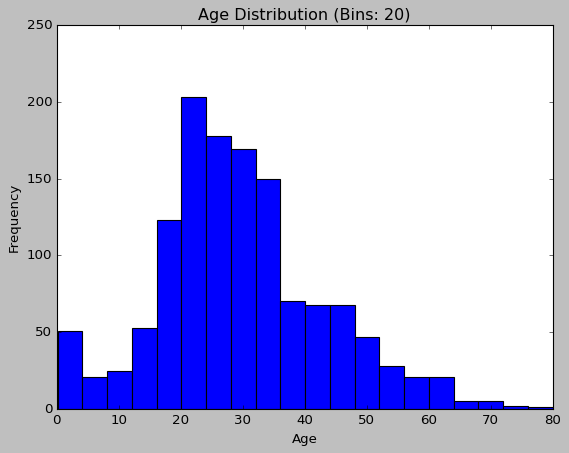

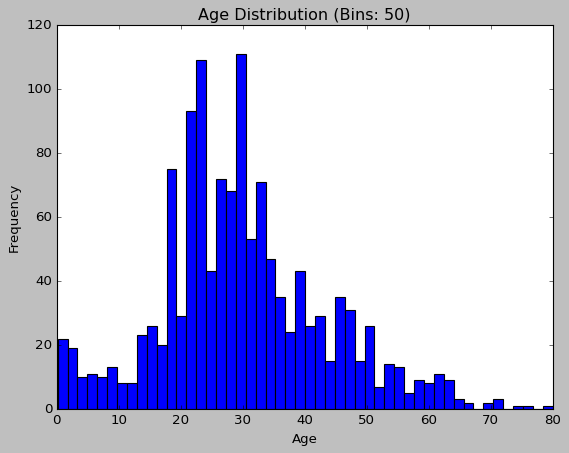

In [10]:
bins = [10, 20, 50]

for bin_width in bins:
    plt.hist(titanic['Age'], bins=bin_width)

    # Add labels and title
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title(f'Age Distribution (Bins: {bin_width})')

    # Show the histogram for the current bin width
    plt.show()

#### How does the bin size affect your plot?

In [11]:
"""
Larger bins smooth out the data, making the histogram less sensitive to small 
fluctuations or noise in the data.

"""

'\nLarger bins smooth out the data, making the histogram less sensitive to small \nfluctuations or noise in the data.\n\n'

#### Use seaborn to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

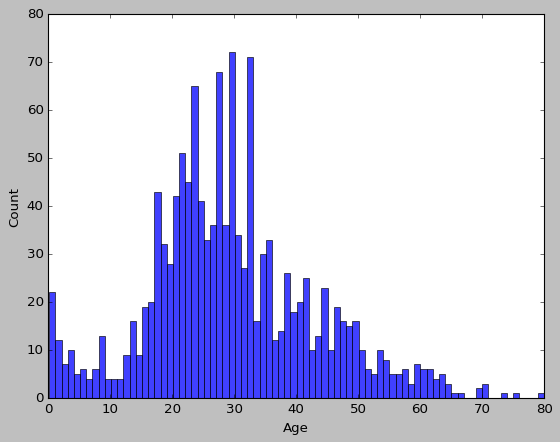

In [12]:
# Create a histogram using Seaborn
sns.histplot(data=titanic, x='Age', bins=80)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

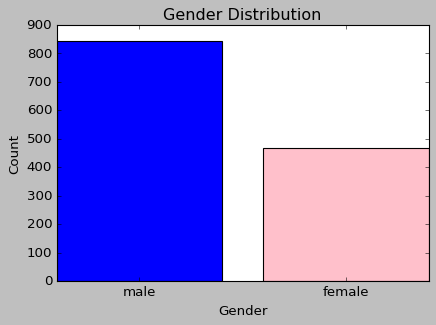

In [13]:
# Assuming you have your data loaded in a DataFrame called df
gender_counts = titanic['Gender'].value_counts()

# Plot using Matplotlib
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_76867/3616751503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Gender', palette={"male": "blue", "female": "pink"})


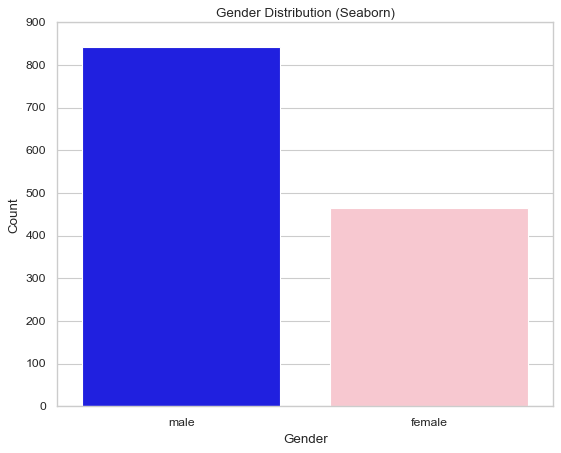

In [14]:
sns.set(style="whitegrid")
sns.countplot(data=titanic, x='Gender', palette={"male": "blue", "female": "pink"})
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution (Seaborn)')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_76867/3119620391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Pclass', palette="Set2")


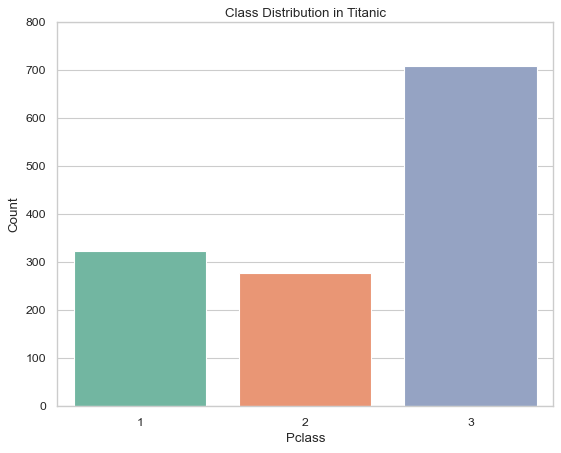

In [15]:
sns.set(style="whitegrid")
sns.countplot(data=titanic, x='Pclass', palette="Set2")

# LABELS
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Class Distribution in Titanic')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

Text(0.5, 0, 'Age')

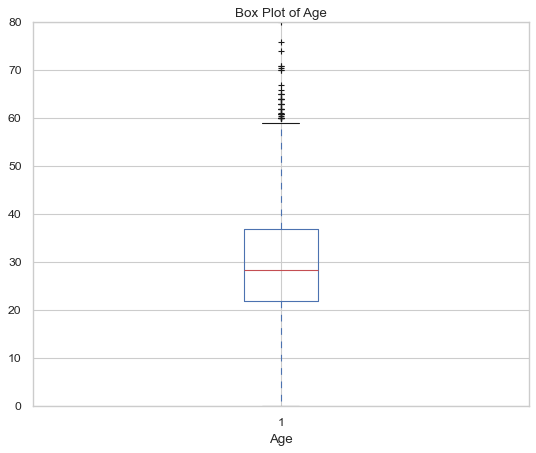

In [16]:
plt.boxplot(titanic['Age'], vert=True)
plt.title('Box Plot of Age')
plt.xlabel("Age")

#### What does the last plot tell you about the feature `Age`?

#### In this viz we can see the following
- Central Tendency: Median as a red line

- Spread: The box in the boxplot represents the interquartile range (IQR), which spans from the lower quartile (Q1) to the upper quartile (Q3)

- Skewness: The shape of the boxplot can provide information about the skewness of the age distribution. In this case its pretty symmetrical.

- Outliers: Individual data points outside the "whiskers" (the lines extending from the box) are considered outliers. In this case, those older than 59/60 can be considered outliers

- Quartiles: The boxplot displays the lower quartile (Q1) and the upper quartile (Q3), which can be used to understand the age distribution within the first and third quartiles of the data. The range between Q1 and Q3 is the IQR. In this case, between `22 - 36`

- Range: The entire range of ages in the dataset can be observed by examining the full extent of the boxplot, from the minimum to the maximum value. `(0, 80)`

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

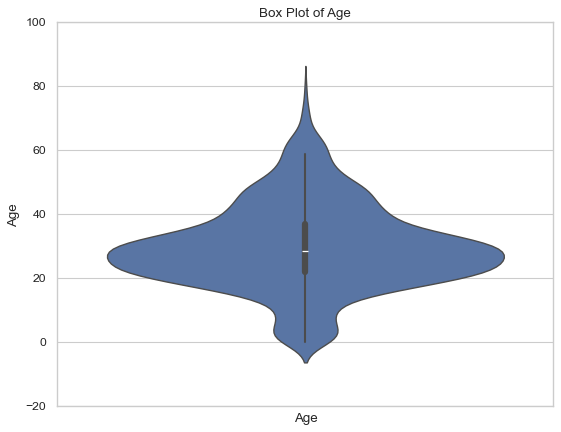

In [17]:
# Create a boxplot of 'Age'
plt.boxplot(titanic['Age'], vert=True)
plt.title('Box Plot of Age')
plt.xlabel("Age")

# Create a violin plot of 'Age'
sns.violinplot(data=titanic, y='Age', inner='box')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

The distribution shape

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0.5, 1.0, 'Scatter Plot of Age vs. Fare')

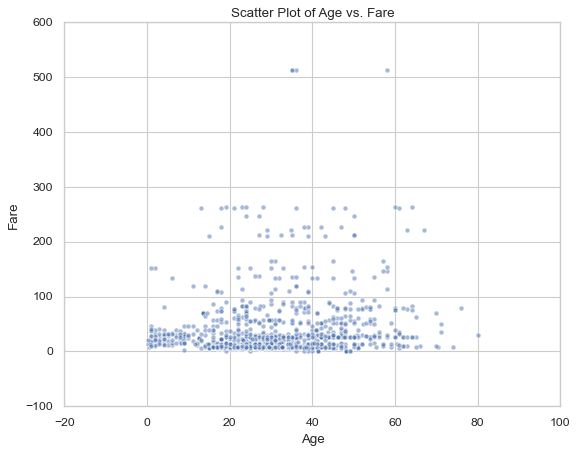

In [18]:
# Create a scatter plot of 'Age' vs. 'Fare'
plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5)  # alpha controls point transparency

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs. Fare')

Text(0.5, 1.0, 'Scatter Plot of Age vs. Fare')

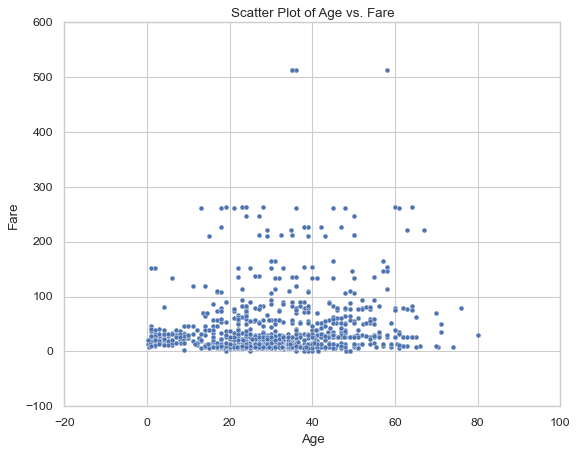

In [19]:
# Method 2 - seaborn

# Create a scatter plot using Seaborn
sns.scatterplot(data=titanic, x='Age', y='Fare')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs. Fare')

#### Plot the correlation matrix using seaborn.

Text(0.5, 1.0, 'Correlation Matrix')

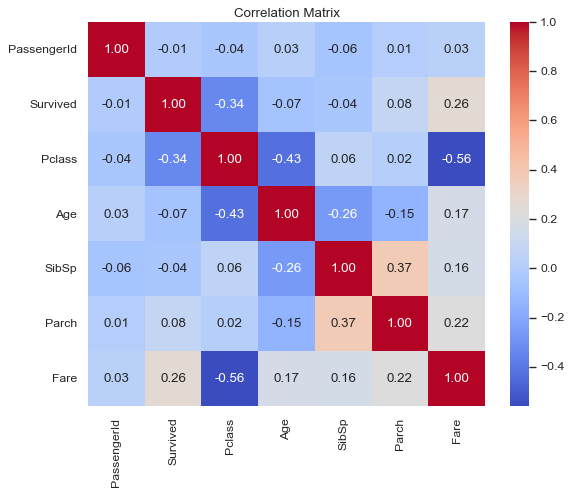

In [20]:
numeric_cols = titanic.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Matrix')

#### What are the most correlated features?

Survived and Pclass: Correlation of approximately -0.34.
Negative correlation: As Pclass (passenger class) increases (i.e., as the class number becomes higher), the likelihood of survival (Survived) decreases.

Pclass and Fare: Correlation of approximately -0.56.
Negative correlation: Higher passenger class (Pclass) is associated with lower fares (Fare), which makes sense as lower class tickets are cheaper.

SibSp (number of siblings/spouses) and Parch (number of parents/children): Correlation of approximately 0.37.
Positive correlation: Passengers traveling with more siblings/spouses (SibSp) tend to have more parents/children (Parch) on board.

Survived and Fare: Correlation of approximately 0.26.
Positive correlation: Higher fares (Fare) are associated with a higher likelihood of survival (Survived), indicating that passengers who paid more may have had a better chance of survival.

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

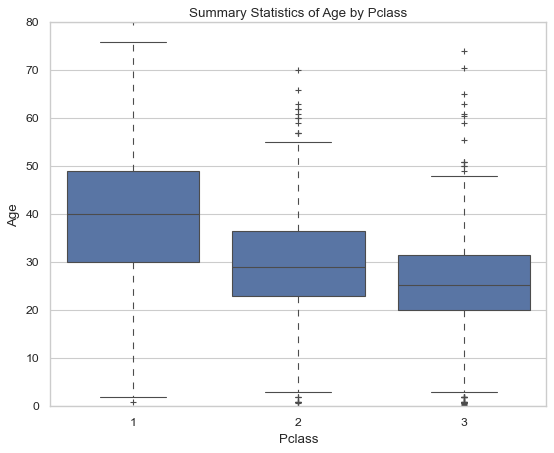

In [21]:
# Create a boxplot
sns.boxplot(data=titanic, x='Pclass', y='Age')


plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Summary Statistics of Age by Pclass')

# Show the plot
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_76867/3090535592.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic, x='Gender', y='Age', palette=custom_palette, showfliers=True, flierprops={'marker': 'o', 'markerfacecolor': 'yellow'})
/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_76867/3090535592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic, x='Gender', y='Age', palette=custom_palette, medianprops={'color': 'red'})


<Axes: xlabel='Gender', ylabel='Age'>

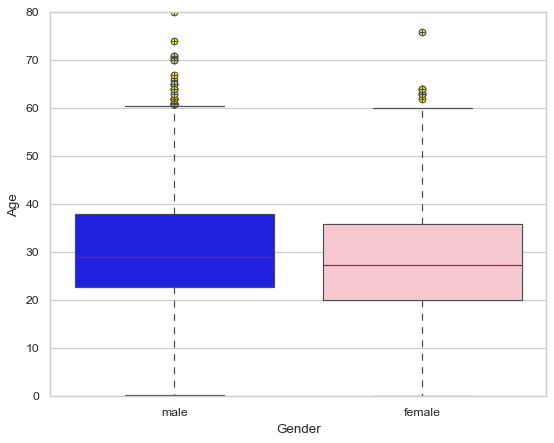

In [22]:
custom_palette = {'male': 'blue', 'female': 'pink'}


sns.boxplot(data=titanic, x='Gender', y='Age', palette=custom_palette, showfliers=True, flierprops={'marker': 'o', 'markerfacecolor': 'yellow'})
sns.boxplot(data=titanic, x='Gender', y='Age', palette=custom_palette, medianprops={'color': 'red'})